In [1]:
from vggt_ba.utils import JsonRetrieval

path = "/home/emmanuel/Desktop/crocodl_challenge/experiments/visual_localization/megaloc.json"

retrieval = JsonRetrieval(path)

In [2]:
#img_repo_paths, ranks, scores = retrieval[191]
img_repo_paths, ranks, scores = retrieval.sample()

In [3]:
import os

crocodl_dataset = "/media/emmanuel/nvme_storage/datasets/crocodl_dataset"

input_abspaths = [
    os.path.join(crocodl_dataset, img_path)
    for img_path in img_repo_paths
]

from PIL import Image
images = [Image.open(path) for path in input_abspaths]

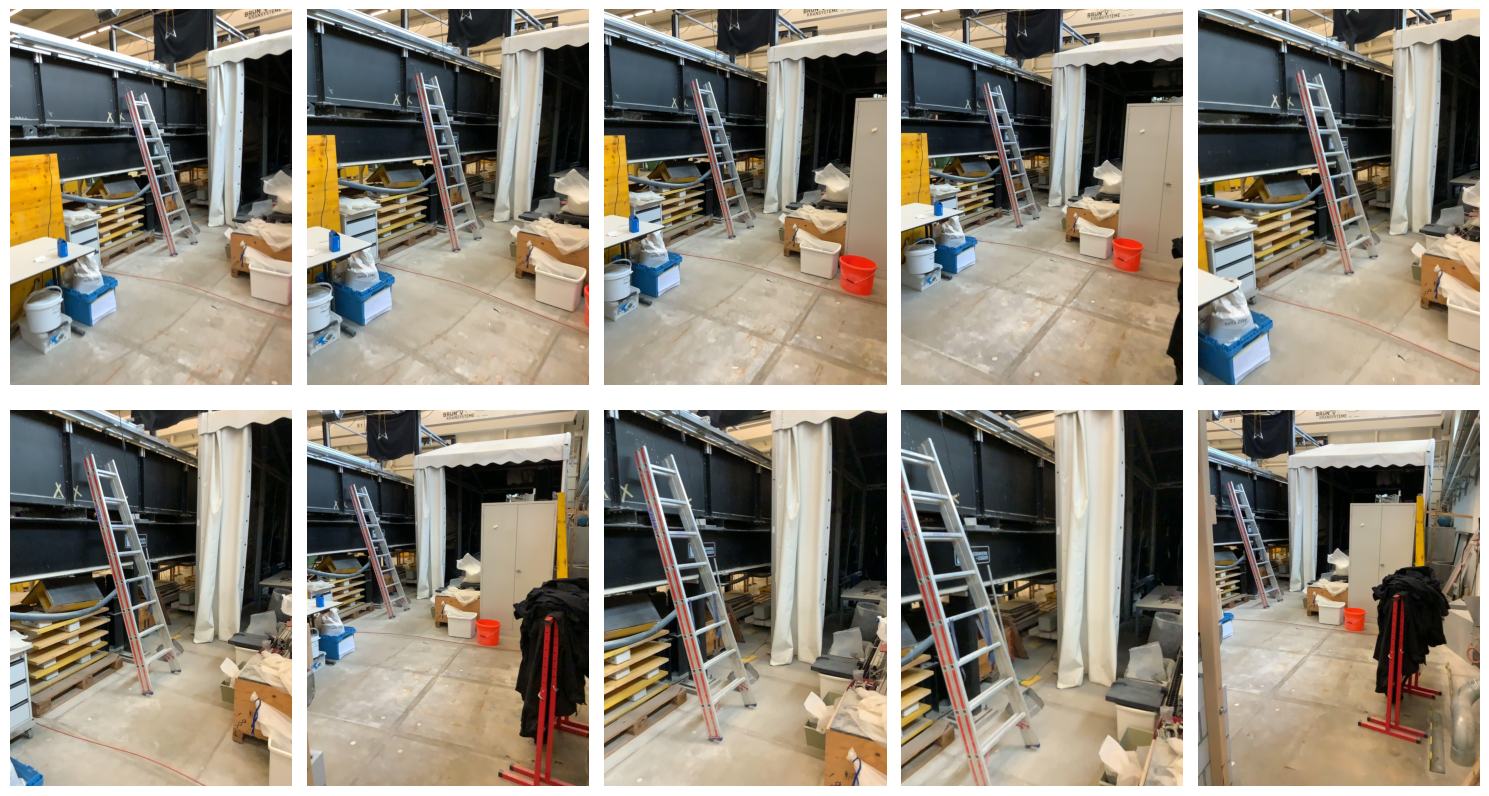

In [4]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

fig, ax = plt.subplots(2, 5, figsize=(15, 9))
axis = ax.flatten()
plt.tight_layout(pad=0, w_pad=0, h_pad=0)
for i, image in enumerate(images):
    ax = axis[i]
    img = np.asarray(image)
    ax.imshow(img)
    ax.axis('off')
plt.tight_layout()
plt.show()

In [5]:
from reranking.reranking import rerank_with_sp_lg_ransac

In [6]:
new_ranks, inliers_cnt = rerank_with_sp_lg_ransac(
    images[0],
    images[1:]
)

In [7]:
reranked_images = [
    images[rank + 1]
    for rank, cnt in zip(new_ranks, inliers_cnt)
    if cnt > 50
]

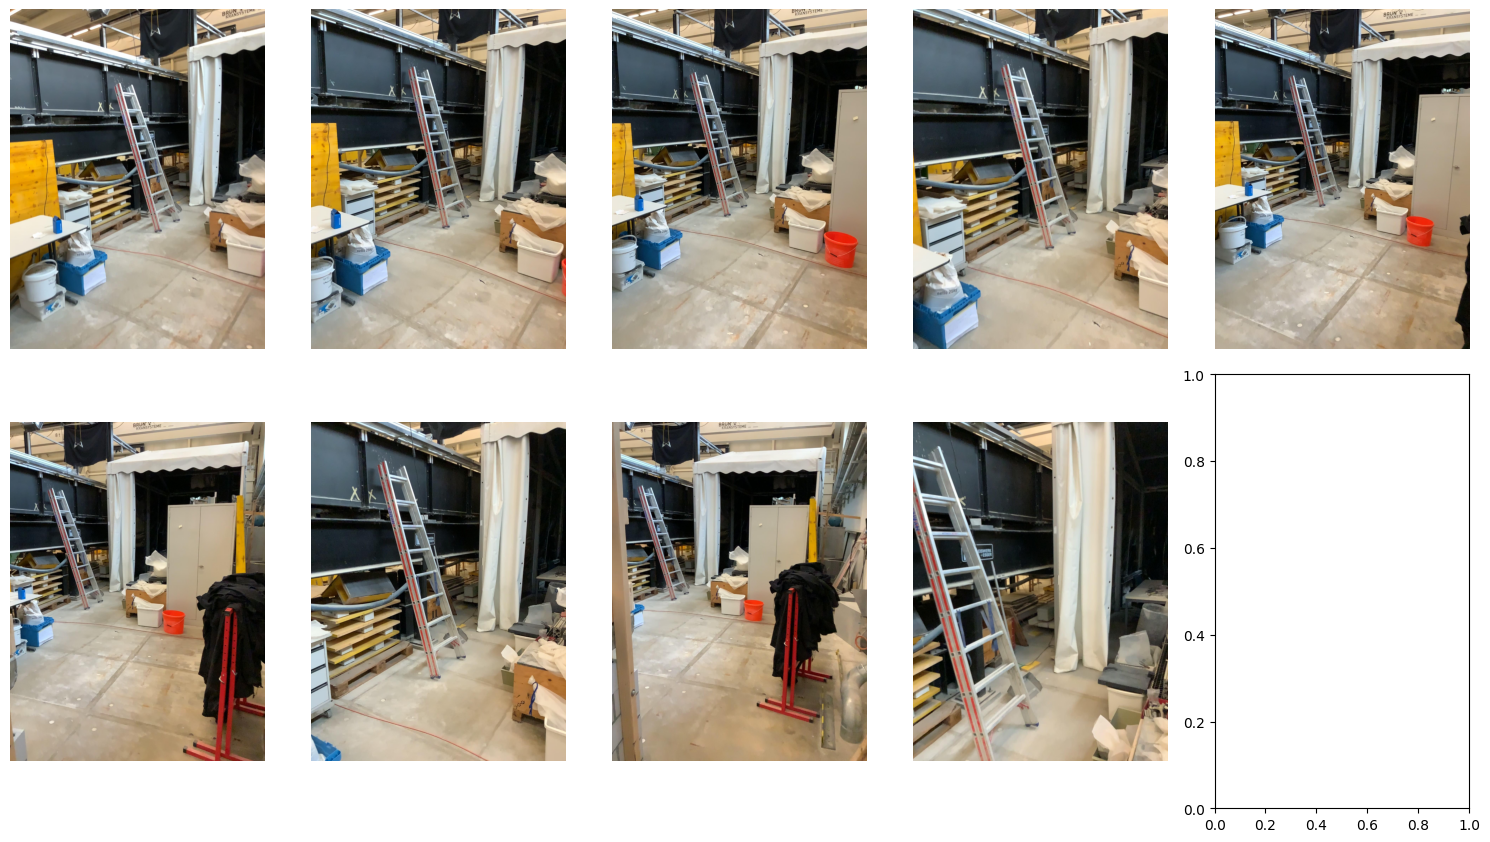

In [8]:
fig, ax = plt.subplots(2, 5, figsize=(15, 9))
axis = ax.flatten()
plt.tight_layout(pad=0, w_pad=0, h_pad=0)
for i, image in enumerate([images[0]] + reranked_images):
    ax = axis[i]
    img = np.asarray(image)
    ax.imshow(img)
    ax.axis('off')
plt.tight_layout()
plt.show()

In [9]:
inliers_cnt

[529, 309, 235, 241, 131, 138, 55, 34, 103]

In [1]:
import pandas as pd

In [6]:
pd.read_csv("/media/emmanuel/nvme_storage/datasets/crocodl_dataset/HYDRO/sessions/hl_query/images.txt").iloc[0].keys()

Index(['# timestamp', ' sensor_id', ' image_path'], dtype='object')

In [13]:
pd.read_csv(fpath, skipinitialspace=True).iloc[0]['image_path']

'hl_2023-11-24-10-12-22-055.000/images/hetlf/376501542.jpg'

In [7]:
fpath = "/media/emmanuel/nvme_storage/datasets/crocodl_dataset/HYDRO/sessions/hl_query/images.txt"

In [8]:
with open(fpath, 'r') as file:
    data = [ [item.strip() for item in line.strip().split(',')] for line in file if line.strip() ]

# Create DataFrame
df = pd.DataFrame(data)

In [9]:
df

0                                     1  \
0     # timestamp                             sensor_id   
1       376501542  hl_2023-11-24-10-12-22-055.000/hetlf   
2       376501542  hl_2023-11-24-10-12-22-055.000/hetrf   
3       376501542  hl_2023-11-24-10-12-22-055.000/hetrr   
4       377656507  hl_2023-11-24-10-12-22-055.000/hetlf   
...           ...                                   ...   
3076   1782336953  hl_2024-05-17-14-29-44-543.001/hetll   
3077   1782996876  hl_2024-05-17-14-29-44-543.001/hetrr   
3078   1782996876  hl_2024-05-17-14-29-44-543.001/hetlf   
3079   1782996876  hl_2024-05-17-14-29-44-543.001/hetll   
3080   1782996876  hl_2024-05-17-14-29-44-543.001/hetrf   

                                                      2  
0                                            image_path  
1     hl_2023-11-24-10-12-22-055.000/images/hetlf/37...  
2     hl_2023-11-24-10-12-22-055.000/images/hetrf/37...  
3     hl_2023-11-24-10-12-22-055.000/images/hetrr/37...  
4     hl_2023-11-24-10-12-22-055.000/images/hetlf/37...  
...                                                 ...  
3076  hl_2024-05-17-14-29-44-543.001/images/hetll/17...  
3077  hl_2024-05-17-14-29-44-543.001/images/hetrr/17...  
3078  hl_2024-05-17-14-29-44-543.001/images/hetlf/17...  
3079  hl_2024-05-17-14-29-44-543.001/images/hetll/17...  
3080  hl_2024-05-17-14-29-44-543.001/images/hetrf/17...  

[3081 rows x 3 columns]

In [1]:
from reranking.reranking.images_txt import get_all_imagestxt

In [4]:
img_txts = get_all_imagestxt('/media/emmanuel/nvme_storage/datasets/crocodl_dataset/')

In [8]:
img_txts['HYDRO/sessions/spot_map'][0]

# timestamp                                               1700821615164836
sensor_id                spot_2023-11-24-11-26/spot-camera-frontleft-image
image_path               spot_2023-11-24-11-26/spot-camera-frontleft-im...
dataset_to_image_path    HYDRO/sessions/spot_map/raw_data/spot_2023-11-...
Name: 0, dtype: object

In [11]:
img_txts['HYDRO/sessions/ios_map'][0]

# timestamp                                                   594450497982
sensor_id                ios_2023-10-27_10.20.23_000/cam_phone_59445049...
image_path               ios_2023-10-27_10.20.23_000/images/59445049798...
dataset_to_image_path    HYDRO/sessions/ios_map/raw_data/ios_2023-10-27...
Name: 0, dtype: object